In [13]:
# First Solution - Descriptive Analysys

ratings = open(r'C:\Users\vaish\OneDrive\Desktop\Nexgen\movie data\ml-1m\ratings.dat')
rating_distribution = dict()
movieId_count = dict()

for line in ratings:
    line = line.strip()
    columns = list(map(int, line.split('::')))
    if columns[2] == 5:
        columns.append('High')
    elif columns[2] == 4 or columns[2] == 3:
        columns.append('Medium')
    else:
        columns.append('Low')

    if columns[1] in movieId_count:
        movieId_count[columns[1]] += 1
    else: 
        movieId_count[columns[1]] = 1

    if columns[4] in rating_distribution:
        rating_distribution[columns[4]] += 1
    else:
        rating_distribution[columns[4]] = 1

for rating_range in rating_distribution:
    print('{0} {1}'.format(rating_range, int(rating_distribution[rating_range] / sum(rating_distribution.values()) * 100)))

movies = open(r'C:\Users\vaish\OneDrive\Desktop\Nexgen\movie data\ml-1m\movies.dat')
movieId_name = dict()
for line in movies:
    line = line.strip()
    columns = line.split('::')
    movieId_name[int(columns[0])] = columns[1]
    
sorted_counted_data = sorted(movieId_count.items(), key = lambda x:x[1], reverse=True)[:10]
for movieId, count in sorted_counted_data:
    print(movieId_name[movieId], count)

High 22
Medium 61
Low 16
American Beauty (1999) 3428
Star Wars: Episode IV - A New Hope (1977) 2991
Star Wars: Episode V - The Empire Strikes Back (1980) 2990
Star Wars: Episode VI - Return of the Jedi (1983) 2883
Jurassic Park (1993) 2672
Saving Private Ryan (1998) 2653
Terminator 2: Judgment Day (1991) 2649
Matrix, The (1999) 2590
Back to the Future (1985) 2583
Silence of the Lambs, The (1991) 2578


In [108]:
# 2. **Genre Insights**

# `Which movie genres are the most frequently rated?`

movies = open(r'C:\Users\vaish\OneDrive\Desktop\Nexgen\movie data\ml-1m\movies.dat')
movie_genre = {}
for line in movies:
    line = line.strip()
    columns = line.split('::')
    genre_list = columns[2].split('|')
    movie_genre[int(columns[0])] = genre_list
    for genre in genre_list:
        if genre in genre_count:
            genre_count[genre] += 1
        else:
            genre_count[genre] = 1
        


ratings = open(r'C:\Users\vaish\OneDrive\Desktop\Nexgen\movie data\ml-1m\ratings.dat')
movie_id_count = {}
for line in ratings:
    line = line.strip()
    columns = line.split('::')
    movie_id = int(columns[1])
    if movie_id in movie_id_count:
        movie_id_count[movie_id] += 1
    else:
        movie_id_count[movie_id] = 1

genre_count = dict()
for movie_id, count in movie_id_count.items():
    genres = movie_genre.get(movie_id, [])
    if genre in genres:
        genre_count[genre] += 1
    else:
        genre_count[genre] = 1


sorted_genre = sorted(genre_count.items(), key = lambda x: x[1], reverse = True)

print("Most frequently rated genre is")
for genre in sorted_genre:
    print(genre[0], ":",genre[1])

movies.close()
ratings.close()

Most frequently rated genre is
Thriller : 1


In [114]:
# `Compare the average ratings across different genres. Are certain genres consistently rated higher or lower?`

movies = open(r'C:\Users\vaish\OneDrive\Desktop\Nexgen\movie data\ml-1m\movies.dat')
ratings = open(r'C:\Users\vaish\OneDrive\Desktop\Nexgen\movie data\ml-1m\ratings.dat')

movie_genre = dict()
for line in movies:
    line = line.strip()
    columns = line.split('::')
    genre_list = columns[2].split('|')
    movie_genre[int(columns[0])] = genre_list

genre_ratings = dict()
for line in ratings:
    line = line.strip()
    columns = line.split('::')
    movie_id = int(columns[1])
    rate = int(columns[2])
    genres = movie_genre.get(movie_id, [])
    
    for genre in genres:
        if genre not in genre_ratings:
            genre_ratings[genre] = []  
        genre_ratings[genre].append(rate)

genre_avg_ratings = {}
for genre, ratings_list in genre_ratings.items():
    total_ratings = sum(ratings_list)
    count_ratings = len(ratings_list)
    avg_rating = total_ratings / count_ratings
    genre_avg_ratings[genre] = avg_rating

sorted_average = sorted(genre_avg_ratings.items(), key = lambda x : x[1])
print("Average rating:", round(avg_rating, 2))


Average rating: 3.93


In [33]:
# 3. **User Engagement Analysis**
# `Identify the most active users (profession) based on the number of ratings they’ve given.`

#number of ratings per users
ratings = open(r'C:\Users\vaish\OneDrive\Desktop\Nexgen\movie data\ml-1m\ratings.dat')
user_id_count = dict()
for line in ratings:
    line = line.strip()
    columns = line.split('::')
    if columns[0] in user_id_count:
        user_id_count[columns[0]] += 1
    else:
        user_id_count[columns[0]] = 1
ratings.close()       

#map user_id_count from ratings and occupation from users data
users = open(r'C:\Users\vaish\OneDrive\Desktop\Nexgen\movie data\ml-1m\users.dat')
occupation_count = dict()
for line in users:
    line = line.strip()
    columns = line.split('::')
    user_id = columns[0]
    occupation = columns[3]
    if user_id in user_id_count:
        if occupation in occupation_count:
            occupation_count[occupation] += 1
        else:
            occupation_count[occupation] = 1

occupation_name = {0:"other" or not specified,
	  1:  "academic/educator",
	  2:  "artist" , 
      3:  "clerical/admin",
	  4:  "college/grad student",
	  5:  "customer service",
	  6:  "doctor/health care",
	  7:  "executive/managerial",
	  8:  "farmer",
	  9:  "homemaker",
	 10:  "K-12 student",
	 11:  "lawyer",
	 12:  "programmer",
	 13:  "retired",
	 14:  "sales/marketing",
	 15:  "scientist",
	 16:  "self-employed",
	 17:  "technician/engineer",
	 18:  "tradesman/craftsman",
	 19:  "unemployed",
	 20:  "writer"
}
occupation_name[int(columns[0])] = columns[1]

            
sorted_data = sorted(occupation_count.items(), key = lambda x:x[1], reverse=True)[:1]
# for occupation, count in sorted_data:
#     print(f'occupation: {occupation}, count: {count}')
for occupation, count in sorted_data:
    occupation = int(occupation)
    print(f"Profession: {occupation_name[occupation]}, Total Ratings: {count}")


Profession: college/grad student, Total Ratings: 759


In [34]:
# 3. *User Engagement Analysis
# Analyze the relationship between user demographic attributes (age, gender, occupation) and their movie preferences or rating patterns.

users = open(r'C:\Users\vaish\OneDrive\Desktop\Nexgen\movie data\ml-1m\users.dat')
movies = open(r'C:\Users\vaish\OneDrive\Desktop\Nexgen\movie data\ml-1m\movies.dat')
ratings = open(r'C:\Users\vaish\OneDrive\Desktop\Nexgen\movie data\ml-1m\ratings.dat')

user = dict()
for line in users:
    line = line.strip()
    columns = line.split('::')
    user[int(columns[0])] = {'gender' : columns[1] , 'age' : int(columns[2]), 'occupation' : int(columns[3])}

# print(user)

movie = dict()
for line in movies:
    line = line.strip()
    columns = line.split('::')
    movie[int(columns[0])] = {'title' : columns[1], 'genre' : columns[2]}

# print(movie)

rating = []
for line in ratings:
    line = line.strip()
    columns = list(map(int, line.split('::')))
    rating.append({'user_id' : columns[0], 'movie_id' : columns[1], 'rating' : columns[2]})

# print(rating)

agegroup = {
    1: "Under 18",
    18: "18-24",
    25: "25-34",
    35: "35-44",
    45: "45-49",
    50: "50-55",
    56: "56+"
}
age_group_ratings = {}
gender_ratings = {'M': [], 'F': []}
occupation_ratings = {}

for value in rating:
    user_id = value['user_id']
    movie_id = value['movie_id']
    rating = value['rating']

    userid = user[user_id]
    gender = user[user_id].get('gender')
    age_group = agegroup.get(user[user_id].get('age'))
    occupation = user[user_id].get('occupation')
    
    if age_group not in age_group_ratings:
        age_group_ratings[age_group] = []
    age_group_ratings[age_group].append(rating)

    gender_ratings[gender].append(rating)

    if occupation not in occupation_ratings:
        occupation_ratings[occupation] = []
    occupation_ratings[occupation].append(rating)

occupation_name = {0:"other" or not specified,
	  1:  "academic/educator",
	  2:  "artist" , 
      3:  "clerical/admin",
	  4:  "college/grad student",
	  5:  "customer service",
	  6:  "doctor/health care",
	  7:  "executive/managerial",
	  8:  "farmer",
	  9:  "homemaker",
	 10:  "K-12 student",
	 11:  "lawyer",
	 12:  "programmer",
	 13:  "retired",
	 14:  "sales/marketing",
	 15:  "scientist",
	 16:  "self-employed",
	 17:  "technician/engineer",
	 18:  "tradesman/craftsman",
	 19:  "unemployed",
	 20:  "writer"
}
occupation_name[int(columns[0])] = columns[1]


age_group_avg = {group: (sum(ratings) / len(ratings)) for group, ratings in age_group_ratings.items()}
print("Average rating by Age group :\n")
for group, avg in age_group_avg.items():
    print(f"{group}: {avg:.2f}")

gender_avg = {group: (sum(ratings) / len(ratings)) for group, ratings in gender_ratings.items()}
print("\nAverage rating by Gender:\n")
for group, avg in gender_avg.items():
    print(f"{group}: {avg:.2f}")


occupation_avg = {group: (sum(ratings) / len(ratings)) for group, ratings in occupation_ratings.items()}
print("\nAverage rating by occupation:\n")
for group, avg in occupation_avg.items():
    print(f"{occupation_name.get(group)}: {avg:.2f}")

Average rating by Age group :

Under 18: 3.55
56+: 3.77
25-34: 3.55
45-49: 3.64
50-55: 3.71
35-44: 3.62
18-24: 3.51

Average rating by Gender:

M: 3.57
F: 3.62

Average rating by occupation:

K-12 student: 3.53
self-employed: 3.60
scientist: 3.69
executive/managerial: 3.60
writer: 3.50
homemaker: 3.66
academic/educator: 3.58
programmer: 3.65
technician/engineer: 3.61
other: 3.54
clerical/admin: 3.66
sales/marketing: 3.62
college/grad student: 3.54
lawyer: 3.62
farmer: 3.47
unemployed: 3.41
artist: 3.57
tradesman/craftsman: 3.53
customer service: 3.54
retired: 3.78
doctor/health care: 3.66


In [53]:
# 4. **Rating Distribution by Demographics**
# `Investigate how ratings vary by user demographic attributes (age, gender, occupation).`
# `Are there specific genres preferred by certain age group and occupation


users_file = open(r'C:\Users\vaish\OneDrive\Desktop\Nexgen\movie data\ml-1m\users.dat')
movies_file = open(r'C:\Users\vaish\OneDrive\Desktop\Nexgen\movie data\ml-1m\movies.dat')
ratings_file = open(r'C:\Users\vaish\OneDrive\Desktop\Nexgen\movie data\ml-1m\ratings.dat')

# Parse user data
user = {}
for line in users_file:
    line = line.strip()
    columns = line.split('::')
    user[int(columns[0])] = {'gender': columns[1], 'age': int(columns[2]), 'occupation': int(columns[3])}

# Parse movie data
movie = {}
for line in movies_file:
    line = line.strip()
    columns = line.split('::')
    movie[int(columns[0])] = {'title': columns[1], 'genres': columns[2].split('|')}

# Parse ratings data
ratings = []
for line in ratings_file:
    line = line.strip()
    columns = list(map(int, line.split('::')))
    ratings.append({'user_id': columns[0], 'movie_id': columns[1], 'rating': columns[2]})

# Define age groups
agegroup = {
    1: "Under 18",
    18: "18-24",
    25: "25-34",
    35: "35-44",
    45: "45-49",
    50: "50-55",
    56: "56+"
}

# Initialize dictionaries to store genre counts
age_group_genre_count = {}
occupation_genre_count = {}

# Process ratings
for value in ratings:
    user_id = value['user_id']
    movie_id = value['movie_id']
    rating_score = float(value['rating'])

    # Get user demographics
    user_details = user[user_id]
    age_group = agegroup.get(user_details['age'])
    occupation = user_details['occupation']

    # Get movie genres
    movie_genres = movie[movie_id]['genres']

    # Process by age group
    if age_group not in age_group_genre_count:
        age_group_genre_count[age_group] = {}
    for genre in movie_genres:
        if genre not in age_group_genre_count[age_group]:
            age_group_genre_count[age_group][genre] = 0
        age_group_genre_count[age_group][genre] += 1

    # Process by occupation
    if occupation not in occupation_genre_count:
        occupation_genre_count[occupation] = {}
    for genre in movie_genres:
        if genre not in occupation_genre_count[occupation]:
            occupation_genre_count[occupation][genre] = 0
        occupation_genre_count[occupation][genre] += 1

# Display results
print("Genre Preferences by Age Group:")
for age_group, genres in age_group_genre_count.items():
    print(f"Age Group: {age_group}")
    for genre, count in genres.items():
        print(f"  {genre}: {count}")

print("\nGenre Preferences by Occupation:")
for occupation, genres in occupation_genre_count.items():
    print(f"Occupation: {occupation}")
    for genre, count in genres.items():
        print(f"  {genre}: {count}")


Genre Preferences by Age Group:
Age Group: Under 18
  Drama: 7483
  Animation: 2449
  Children's: 4337
  Musical: 1647
  Romance: 3599
  Comedy: 11162
  Action: 6578
  Adventure: 3998
  Fantasy: 1360
  Sci-Fi: 4178
  War: 1578
  Thriller: 4824
  Crime: 1701
  Film-Noir: 330
  Mystery: 920
  Horror: 2211
  Documentary: 130
  Western: 335
Age Group: 56+
  Drama: 17269
  Romance: 6279
  Comedy: 11961
  War: 3775
  Action: 8143
  Crime: 2974
  Adventure: 4488
  Mystery: 2147
  Fantasy: 948
  Sci-Fi: 4880
  Thriller: 6537
  Western: 1333
  Horror: 1761
  Film-Noir: 1207
  Musical: 1889
  Documentary: 260
  Animation: 1083
  Children's: 1888
Age Group: 25-34
  Comedy: 143210
  Action: 105678
  Adventure: 52633
  Mystery: 15160
  Romance: 58003
  Sci-Fi: 63156
  War: 24830
  Thriller: 77429
  Drama: 138695
  Fantasy: 14290
  Horror: 31235
  Animation: 16454
  Children's: 25743
  Western: 7053
  Musical: 14705
  Film-Noir: 6539
  Crime: 33030
  Documentary: 3489
Age Group: 45-49
  Drama: 32141

In [79]:
# 5. **Top Performers**
# `Identify the movies with the highest average ratings (considering a minimum number of ratings for fairness).`
# Analyze the characteristics of top-rated movies (e.g., release year, genres).`

ratings_file = open(r'C:\Users\vaish\OneDrive\Desktop\Nexgen\movie data\ml-1m\ratings.dat')
movies_file = open(r'C:\Users\vaish\OneDrive\Desktop\Nexgen\movie data\ml-1m\movies.dat')

# Dictionaries to store total ratings, count, and movie details
movie_ratings = {}
movie_titles = {}
movie_data = {}
movie_genres = {}


for line in movies_file:
    line = line.strip()
    columns = line.split('::')
    movie_id = int(columns[0])  # Movie ID as integer
    title = columns[1]
    genres = columns[2].split('|')
    release_year = int(title.strip()[-5:-1])  # Extract year from the title string

    movie_titles[movie_id] = title
    movie_data[movie_id] = {'title': title, 'release_year': release_year}
    movie_genres[movie_id] = genres


for line in ratings_file:
    line = line.strip()
    columns = line.split('::')
    movie_id = int(columns[1])  # Movie ID as integer
    rating = float(columns[2])

    if movie_id not in movie_ratings:
        movie_ratings[movie_id] = {'total_rating': 0, 'count': 0}
    
    movie_ratings[movie_id]['total_rating'] += rating
    movie_ratings[movie_id]['count'] += 1

ratings_file.close()
movies_file.close()

# Minimum number of ratings required for fairness
min_ratings = 50

# Dictionary to store the average ratings of movies
movie_avg_ratings = {}

for movie_id, data in movie_ratings.items():
    if data['count'] >= min_ratings:
        avg_rating = data['total_rating'] / data['count']
        movie_avg_ratings[movie_id] = avg_rating


sorted_movies = sorted(movie_avg_ratings.items(), key=lambda x: x[1], reverse=True)


print("Top 10 Movies with Highest Average Ratings (at least 50 ratings):\n")
for movie_id, avg_rating in sorted_movies[:10]:
    print(f"{movie_titles[movie_id]}: {avg_rating:.2f}")


print("\nTop-rated movies and their characteristics:")
for movie_id, avg_rating in sorted_movies[:10]:  # Top 10 movies
    print(f"Movie ID: {movie_id}, Average Rating: {avg_rating:.2f}")
    print(f"Title: {movie_data[movie_id]['title']}")
    print(f"Release Year: {movie_data[movie_id]['release_year']}")
    print(f"Genres: {', '.join(movie_genres[movie_id])}")
    print("-" * 40)


Top 10 Movies with Highest Average Ratings (at least 50 ratings):

Sanjuro (1962): 4.61
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954): 4.56
Shawshank Redemption, The (1994): 4.55
Godfather, The (1972): 4.52
Close Shave, A (1995): 4.52
Usual Suspects, The (1995): 4.52
Schindler's List (1993): 4.51
Wrong Trousers, The (1993): 4.51
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950): 4.49
Raiders of the Lost Ark (1981): 4.48

Top-rated movies and their characteristics:
Movie ID: 2905, Average Rating: 4.61
Title: Sanjuro (1962)
Release Year: 1962
Genres: Action, Adventure
----------------------------------------
Movie ID: 2019, Average Rating: 4.56
Title: Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)
Release Year: 1954
Genres: Action, Drama
----------------------------------------
Movie ID: 318, Average Rating: 4.55
Title: Shawshank Redemption, The (1994)
Release Year: 1994
Genres: Drama
----------------------------------------
Movie ID: 858, Average R

In [98]:
# 6. **Exploring Long Tail**
# `Investigate the "long tail" of the dataset: How many movies receive very few ratings?`
# `What are the characteristics of these less-rated movies compared to popular ones?`


movies_file = open(r'C:\Users\vaish\OneDrive\Desktop\Nexgen\movie data\ml-1m\movies.dat')
movie_titles = {}
movie_data = {}
movie_genres = {}

for line in movies_file:
    line = line.strip()
    columns = line.split('::')
    movie_id = int(columns[0])  
    title = columns[1]
    genres = columns[2].split('|')
    release_year = int(title.strip()[-5:-1])  

    movie_titles[movie_id] = title
    movie_data[movie_id] = {'title': title, 'release_year': release_year}
    movie_genres[movie_id] = genres
    
ratings_file = open(r'C:\Users\vaish\OneDrive\Desktop\Nexgen\movie data\ml-1m\ratings.dat')
movie_ratings = {}
for line in ratings_file:
    line = line.strip()
    columns = line.split('::')
    movie_id = int(columns[1]) 
    rating = float(columns[2])

    if movie_id not in movie_ratings:
        movie_ratings[movie_id] = {'total_rating': 0, 'count': 0}
    
    movie_ratings[movie_id]['total_rating'] += rating
    movie_ratings[movie_id]['count'] += 1

ratings_file.close()
movies_file.close()

# Minimum number of ratings required for fairness
min_ratings = 50
movie_avg_ratings = {}

for movie_id, data in movie_ratings.items():
    if data['count'] >= min_ratings:
        avg_rating = data['total_rating'] / data['count']
        movie_avg_ratings[movie_id] = avg_rating

threshold = 5
long_tail_movies = {movie_id: data for movie_id, data in movie_ratings.items() if data['count'] <= threshold}
        
sorted_movies = sorted(long_tail_movies.items(), key=lambda x: x[1]['total_rating'], reverse=True)
print('Movies with few ratings:', len(sorted_movies))
# print(sorted_movies)
# What are the characteristics of these less-rated movies compared to popular ones?`
for movie_id, data in sorted_movies[:10]:
    print(f'MovieID: {movie_id}, Average Rating: {avg_rating:.2f}')
    print(f'Title: {movie_data[movie_id]['title']}')
    print(f'Release year: {movie_data[movie_id]['release_year']}')
    print(f'genres: {','.join(movie_genres[movie_id])}')
    print('-' *40)
    

Movies with few ratings: 329
MovieID: 3245, Average Rating: 2.92
Title: I Am Cuba (Soy Cuba/Ya Kuba) (1964)
Release year: 1964
genres: Drama
----------------------------------------
MovieID: 2930, Average Rating: 2.92
Title: Return with Honor (1998)
Release year: 1998
genres: Documentary
----------------------------------------
MovieID: 1664, Average Rating: 2.92
Title: Nénette et Boni (1996)
Release year: 1996
genres: Drama
----------------------------------------
MovieID: 1741, Average Rating: 2.92
Title: Midaq Alley (Callejón de los milagros, El) (1995)
Release year: 1995
genres: Drama
----------------------------------------
MovieID: 3232, Average Rating: 2.92
Title: Seven Chances (1925)
Release year: 1925
genres: Comedy
----------------------------------------
MovieID: 1901, Average Rating: 2.92
Title: Dear Jesse (1997)
Release year: 1997
genres: Documentary
----------------------------------------
MovieID: 2444, Average Rating: 2.92
Title: 24 7: Twenty Four Seven (1997)
Release y

In [2]:
# 7. **Tag Analysis**
# `Analyze the tags associated with movies. What are the most frequently used tags?`

movies_file = open(r'C:\Users\vaish\OneDrive\Desktop\Nexgen\movie data\ml-1m\movies.dat')

# Dictionary to store genre counts
genre_counts = {}

for line in movies_file:
    line = line.strip()
    columns = line.split('::')
    genres = columns[2].split('|') 

    for genre in genres:
        if genre in genre_counts:
            genre_counts[genre] += 1
        else:
            genre_counts[genre] = 1

movies_file.close()

sorted_genres = sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)

print("Most Frequently Used Genres:")
for genre, count in sorted_genres:
    print(f"{genre}: {count}")


Most Frequently Used Genres:
Drama: 1603
Comedy: 1200
Action: 503
Thriller: 492
Romance: 471
Horror: 343
Adventure: 283
Sci-Fi: 276
Children's: 251
Crime: 211
War: 143
Documentary: 127
Musical: 114
Mystery: 106
Animation: 105
Fantasy: 68
Western: 68
Film-Noir: 44


In [10]:
# `Are tags consistent with movie genres?`

movies_file = open(r'C:\Users\vaish\OneDrive\Desktop\Nexgen\movie data\ml-1m\movies.dat')
ratings_file = open(r'C:\Users\vaish\OneDrive\Desktop\Nexgen\movie data\ml-1m\ratings.dat')

movie_ratings = {}  
movie_genres = {}   

for line in movies_file:
    line = line.strip()
    columns = line.split('::')
    movie_id = columns[0]
    genres = columns[2].split('|')
    movie_genres[movie_id] = genres

movies_file.close()

for line in ratings_file:
    line = line.strip()
    columns = line.split('::')
    movie_id = columns[1]
    rating = float(columns[2])

    if movie_id not in movie_ratings:
        movie_ratings[movie_id] = {'total_rating': 0, 'count': 0}

    movie_ratings[movie_id]['total_rating'] += rating
    movie_ratings[movie_id]['count'] += 1

ratings_file.close()

genre_ratings = {}

for movie_id, rating_data in movie_ratings.items():
    if movie_id in movie_genres:  # Ensure movie is in genres data
        avg_rating = rating_data['total_rating'] / rating_data['count']

        for genre in movie_genres[movie_id]:
            if genre not in genre_ratings:
                genre_ratings[genre] = {'total_rating': 0, 'count': 0}

            genre_ratings[genre]['total_rating'] += avg_rating
            genre_ratings[genre]['count'] += 1


print("\nAverage Ratings by Genre:")
for genre, data in genre_ratings.items():
    avg_genre_rating = data['total_rating'] / data['count']
    print(f"{genre}: {avg_genre_rating:.2f}")



Average Ratings by Genre:
Drama: 3.42
Animation: 3.36
Children's: 3.01
Musical: 3.39
Romance: 3.34
Comedy: 3.16
Action: 3.10
Adventure: 3.10
Fantasy: 3.10
Sci-Fi: 3.07
War: 3.59
Thriller: 3.23
Crime: 3.39
Mystery: 3.44
Western: 3.47
Horror: 2.73
Film-Noir: 3.81
Documentary: 3.69


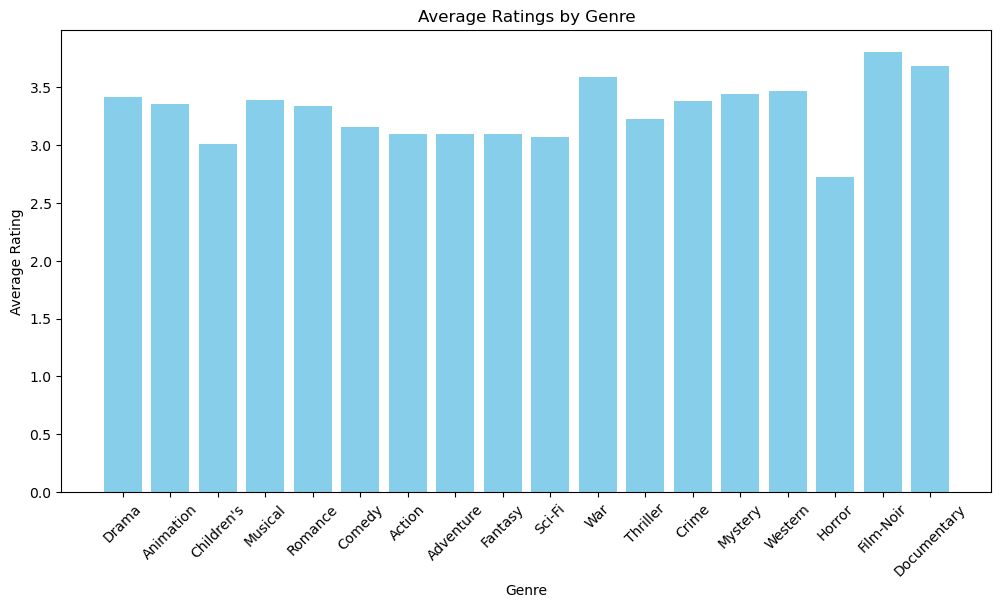

In [6]:
import matplotlib.pyplot as plt

# Prepare data: Average ratings by genre
genre_avg_ratings = {}

for movie_id, rating_data in movie_ratings.items():
    avg_rating = rating_data['total_rating'] / rating_data['count']
    if movie_id in movie_genres:
        for genre in movie_genres[movie_id]:
            if genre not in genre_avg_ratings:
                genre_avg_ratings[genre] = []
            genre_avg_ratings[genre].append(avg_rating)

# Calculate average ratings for each genre
genre_avg = {genre: sum(ratings) / len(ratings) for genre, ratings in genre_avg_ratings.items()}

# Plot
plt.figure(figsize=(12, 6))
plt.bar(genre_avg.keys(), genre_avg.values(), color='skyblue')
plt.title("Average Ratings by Genre")
plt.xlabel("Genre")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()


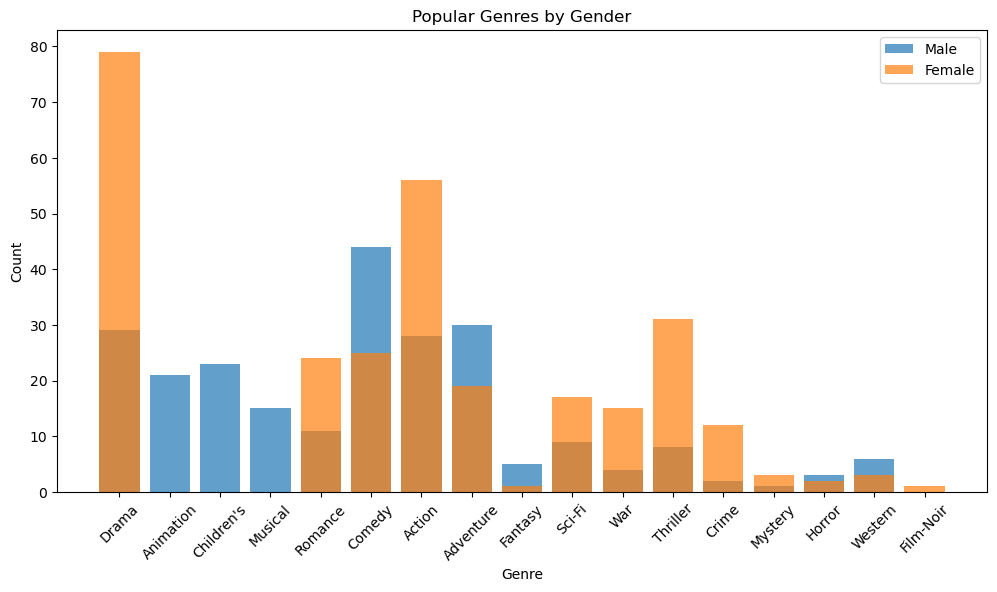

In [14]:
movies_file = open(r'C:\Users\vaish\OneDrive\Desktop\Nexgen\movie data\ml-1m\movies.dat')
ratings_file = open(r'C:\Users\vaish\OneDrive\Desktop\Nexgen\movie data\ml-1m\ratings.dat')

user_demo = {'1': 'M', '2': 'F', '3': 'M'}

# Count genres by gender
genre_gender_count = {'M': {}, 'F': {}}

for line in ratings_file:
    columns = line.split('::')
    user_id = columns[0]
    movie_id = columns[1]

    if user_id in user_demo and movie_id in movie_genres:
        gender = user_demo[user_id]
        for genre in movie_genres[movie_id]:
            if genre not in genre_gender_count[gender]:
                genre_gender_count[gender][genre] = 0
            genre_gender_count[gender][genre] += 1

# Plot
male_counts = genre_gender_count['M']
female_counts = genre_gender_count['F']

plt.figure(figsize=(12, 6))
plt.bar(male_counts.keys(), male_counts.values(), label="Male", alpha=0.7)
plt.bar(female_counts.keys(), female_counts.values(), label="Female", alpha=0.7)
plt.title("Popular Genres by Gender")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.legend()
plt.xticks(rotation=45)
plt.show()


Correlational maxtrix
[[ 1.          0.99861337 -0.23298402]
 [ 0.99861337  1.         -0.19776304]
 [-0.23298402 -0.19776304  1.        ]]


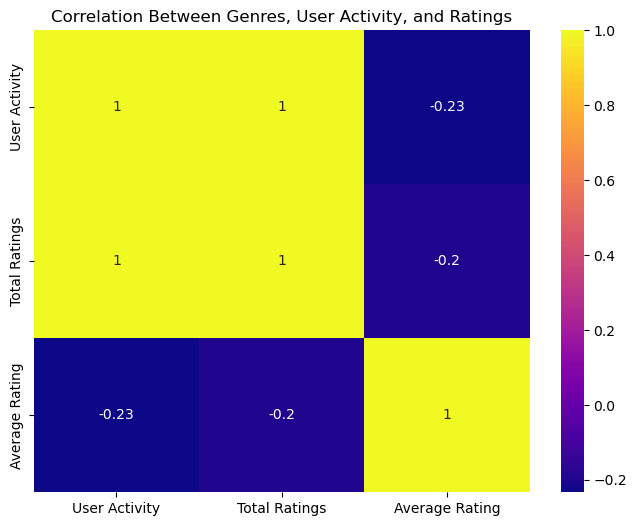

In [23]:
# 8. *Visualization Projects*

# Heatmaps showing the correlation between genres, user activity, and ratings

import csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

movies_file = open(r"C:\Users\vaish\OneDrive\Desktop\Nexgen\movie data\ml-1m\movies.dat",'r', encoding='latin1')
rating_file = open(r"C:\Users\vaish\OneDrive\Desktop\Nexgen\movie data\ml-1m\ratings.dat", 'r', encoding='latin1')

ratings = []
for line in rating_file:
    line = line.strip()
    columns = list(map(int, line.split('::')))
    user_id = columns[0]
    movie_id = columns[1]
    rating = columns[2]
    ratings.append((user_id, movie_id, rating))
    
movies = {}
movie_genres = set()
for line in movies_file:
    line = line.strip()
    columns = line.split('::')
    movie_id = int(columns[0])
    genres = columns[2].split('|')
    movies[movie_id] = genres
    movie_genres.update(genres)
    
genre_stats = {genre: {'Total Ratings': 0, 'Rating Count': 0} for genre in movie_genres}

for user_id, movie_id, rating in ratings:
    if movie_id in movies:
        genres = movies[movie_id]
        for genre in genres:
            genre_stats[genre]['Total Ratings'] += rating
            genre_stats[genre]['Rating Count'] += 1

for genre, stats in genre_stats.items():
    stats['Average Rating'] = stats['Total Ratings'] / stats['Rating Count'] if stats['Rating Count'] > 0 else 0
    stats['User Activity'] = stats['Rating Count']

genres = list(genre_stats.keys())
user_activity = [genre_stats[genre]['User Activity'] for genre in genres]
total_ratings = [genre_stats[genre]['Total Ratings'] for genre in genres]
average_ratings = [genre_stats[genre]['Average Rating'] for genre in genres]

data_matrix = np.array([user_activity, total_ratings, average_ratings])
correlation_matrix = np.corrcoef(data_matrix)

print("Correlational maxtrix")
print(correlation_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    xticklabels=['User Activity', 'Total Ratings', 'Average Rating'],
    yticklabels=['User Activity', 'Total Ratings', 'Average Rating'],
    cmap='plasma'
)
plt.title('Correlation Between Genres, User Activity, and Ratings')
plt.show()